In [2]:
!pip install polars==1.14.0 matplotlib==3.9.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 73.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import matplotlib.pyplot as plt
import polars as pl

In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
# Load the CSV file
df = pl.read_csv('data/survey_results_public.csv')

# Split columns containing ';' into arrays
for col in df.columns:
  if df[col].dtype == pl.Utf8 and df[col].str.contains(";").any():
    df = df.with_columns(df[col].str.split(";").alias(col))

print(f"Number of rows: {len(df)}")
df.head()

Number of rows: 65437


ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,…,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
i64,str,str,list[str],str,str,list[str],str,list[str],list[str],list[str],str,str,str,str,str,list[str],str,list[str],str,str,str,list[str],list[str],list[str],list[str],list[str],list[str],list[str],list[str],list[str],list[str],list[str],list[str],list[str],list[str],list[str],…,list[str],list[str],str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,list[str],list[str],str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
1,"""I am a developer by profession""","""Under 18 years old""","[""Employed, full-time""]","""Remote""","""Apples""","[""Hobby""]","""Primary/elementary school""","[""Books / Physical media""]","[""NA""]","[""NA""]","""NA""","""NA""","""NA""","""NA""","""NA""","[""NA""]","""NA""","[""NA""]","""United States of America""","""NA""","""NA""","[""NA""]","[""NA""]","[""NA""]","[""NA""]","[""NA""]","[""NA""]","[""NA""]","[""NA""]","[""NA""]","[""NA""]","[""NA""]","[""NA""]","[""NA""]","[""NA""]","[""NA""]",…,"[""NA""]","[""NA""]","""No""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","[""NA""]","[""NA""]","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA"""
2,"""I am a developer by profession""","""35-44 years old""","[""Employed, full-time""]","""Remote""","""Apples""","[""Hobby"", ""Contribute to open-source projects"", ""Other (please specify):""]","""Bachelor’s degree (B.A., B.S.,…","[""Books / Physical media"", ""Colleague"", … ""Other online resources (e.g., videos, blogs, forum, online community)""]","[""Technical documentation"", ""Blogs"", … ""Stack Overflow""]","[""API document(s) and/or SDK document(s)"", ""User guides or README files found in the source repository"", … ""Traditional public search engine""]","""20""","""17""","""Developer, full-stack""","""NA""","""NA""","[""NA""]","""NA""","[""NA""]","""United Kingdom of Great Britai…","""NA""","""NA""","[""Bash/Shell (all shells)"", ""Go"", … ""TypeScript""]","[""Bash/Shell (all shells)"", ""Go"", … ""TypeScript""]","[""Bash/Shell (all shells)"", ""Go"", … ""TypeScript""]","[""Dynamodb"", ""MongoDB"", ""PostgreSQL""]","[""PostgreSQL""]","[""PostgreSQL""]","[""Amazon Web Services (AWS)"", ""Heroku"", ""Netlify""]","[""Amazon Web Services (AWS)"", ""Heroku"", ""Netlify""]","[""Amazon Web Services (AWS)"", ""Heroku"", ""Netlify""]","[""Express"", ""Next.js"", … ""React""]","[""Express"", ""Htmx"", … ""Remix""]","[""Express"", ""Node.js"", ""React""]","[""NA""]","[""NA""]","[""NA""]",…,"[""NA""]","[""NA""]","""Yes""","""Individual contributor""","""17""","""Agree""","""Disagree""","""Agree""","""Agree""","""Agree""","""Neither agree nor disagree""","""Disagree""","""Agree""","""Agree""","""NA""","""NA""","""NA""","""NA""","""NA""","[""NA""]","[""NA""]","""NA""","""NA""","""NA""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""

In [11]:
# Default theme
plt.style.use('dark_background')

def plot_value(
    column: str,
    label: str,
    title: str,
) -> None:
    sub_df = df.select([
        "ResponseId",
        column,
        "Country"
    ])

    # Transform the column into an array
    sub_df = sub_df.explode(column)

    # Remove "NA" values
    sub_df = sub_df.filter(sub_df[column] != "NA")

    # Calculate the proportion
    sub_df_global = sub_df[column].value_counts(normalize=True).sort("proportion")
    sub_df_france = sub_df.filter(sub_df["Country"] == "France")[column].value_counts(normalize=True).sort("proportion")

    # Top 5
    sub_df_global = sub_df_global.tail(5)
    sub_df_france = sub_df_france.tail(5)

    # Add missing labels
    for unique_label in sub_df_global[column].append(sub_df_france[column]).unique():
        if unique_label not in sub_df_global[column]:
            sub_df_global = pl.concat([sub_df_global, pl.DataFrame({
                column: unique_label,
                "proportion": 0.0,
            })])
        if unique_label not in sub_df_france[column]:
            sub_df_france = pl.concat([sub_df_france, pl.DataFrame({
                column: unique_label,
                "proportion": 0.0,
            })])

    # Sort again by proportion
    sub_df_france = sub_df_france.sort("proportion")

    # Init plot
    _, ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel('Proportion (%)')
    ax.set_ylabel(label)

    # Plot France data
    ax.barh(
        alpha=0.5,
        label='France',
        color='blue',
        width=sub_df_france["proportion"] * 100,
        y=sub_df_france[column],
    )

    # Plot global data
    ax.plot(
        sub_df_global["proportion"] * 100,
        sub_df_global[column],
        'o',
        alpha=0.5,
        color='red',
        label='Global',
    )

    # Add legend
    ax.legend(
        framealpha=0.5,
        loc='lower right',
    )

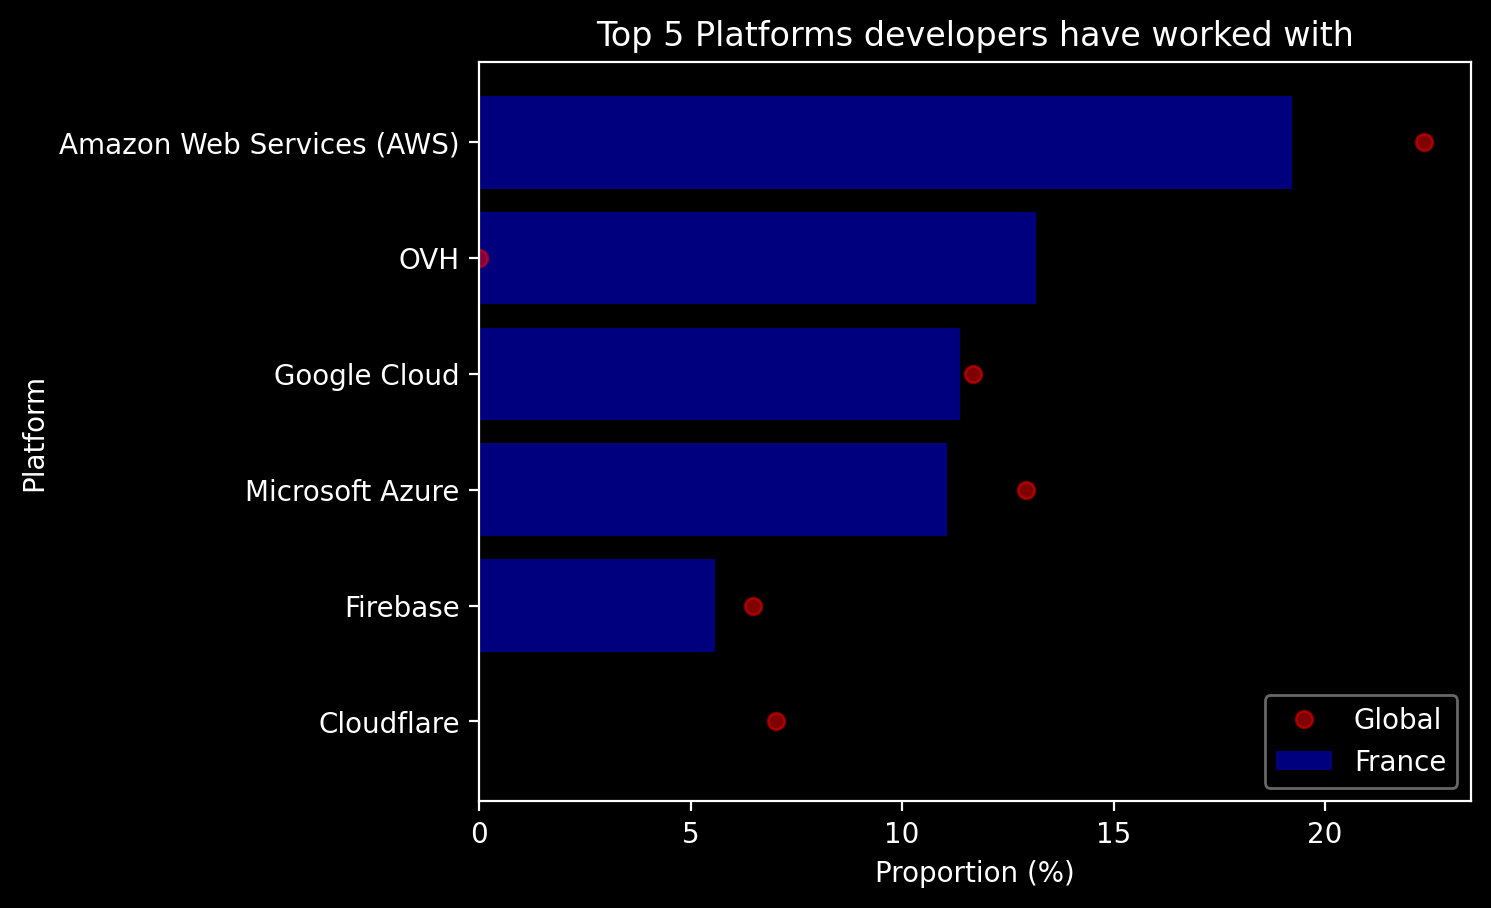

In [12]:
plot_value(
  column="PlatformHaveWorkedWith",
  label="Platform",
  title="Top 5 Platforms developers have worked with"
)

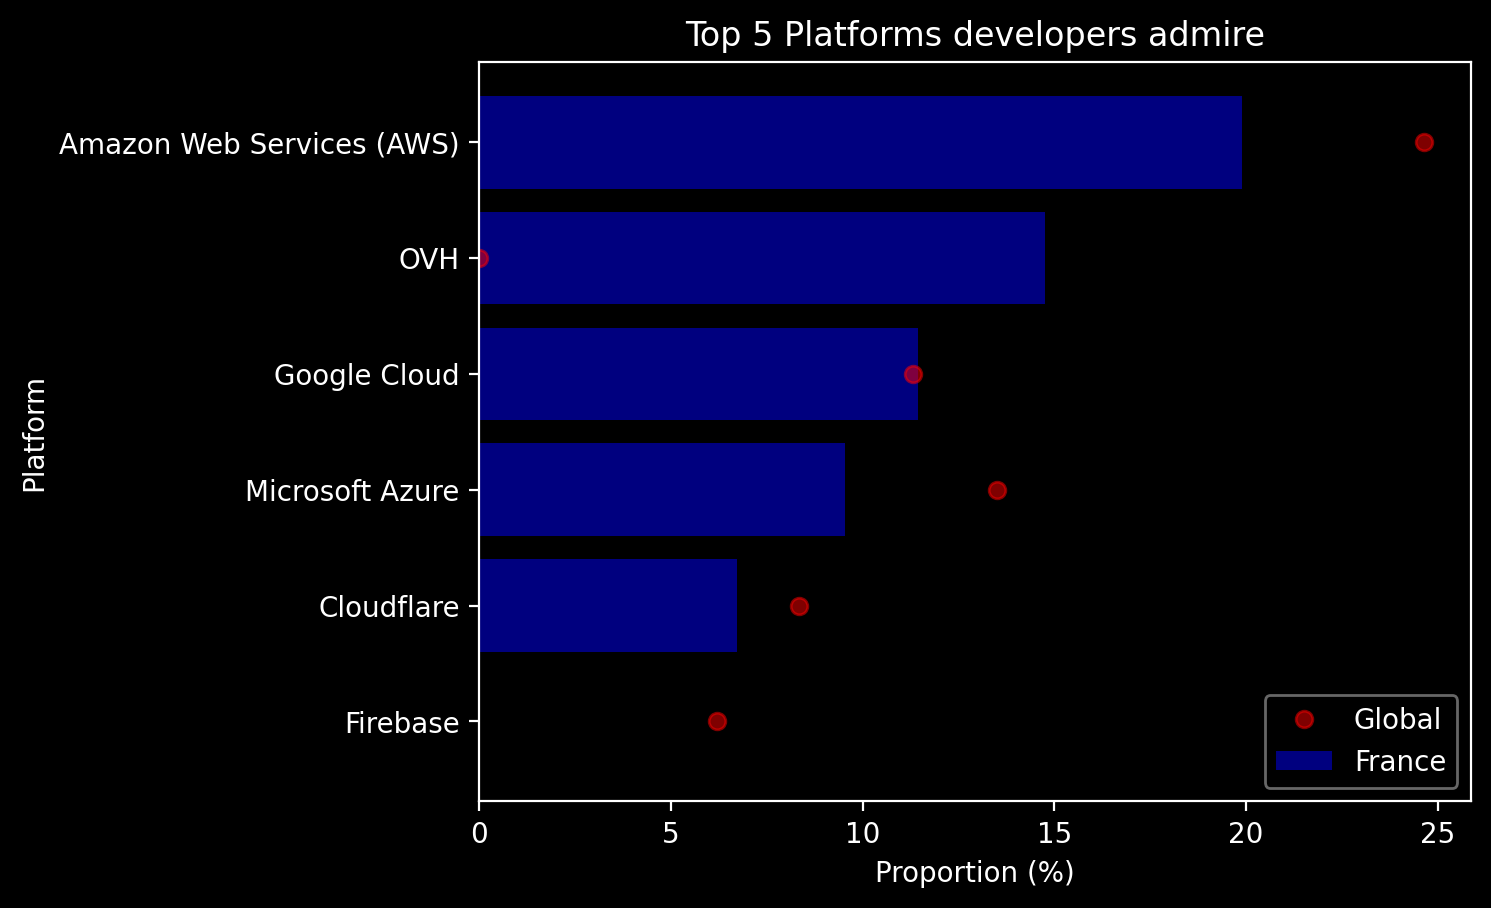

In [14]:
plot_value(
  column="PlatformAdmired",
  label="Platform",
  title="Top 5 Platforms developers admire"
)

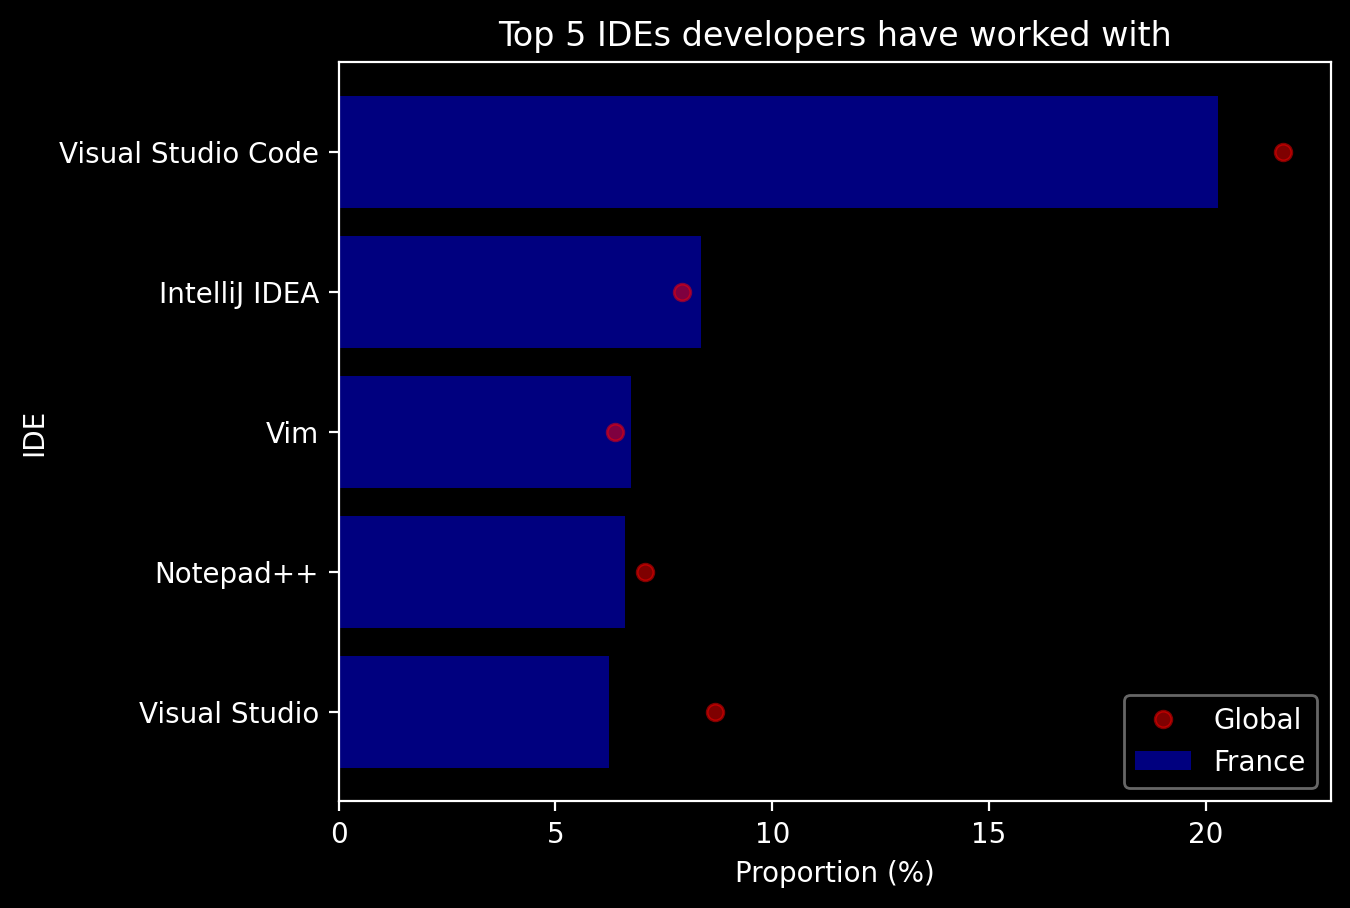

In [15]:
plot_value(
  column="NEWCollabToolsHaveWorkedWith",
  label="IDE",
  title="Top 5 IDEs developers have worked with",
)

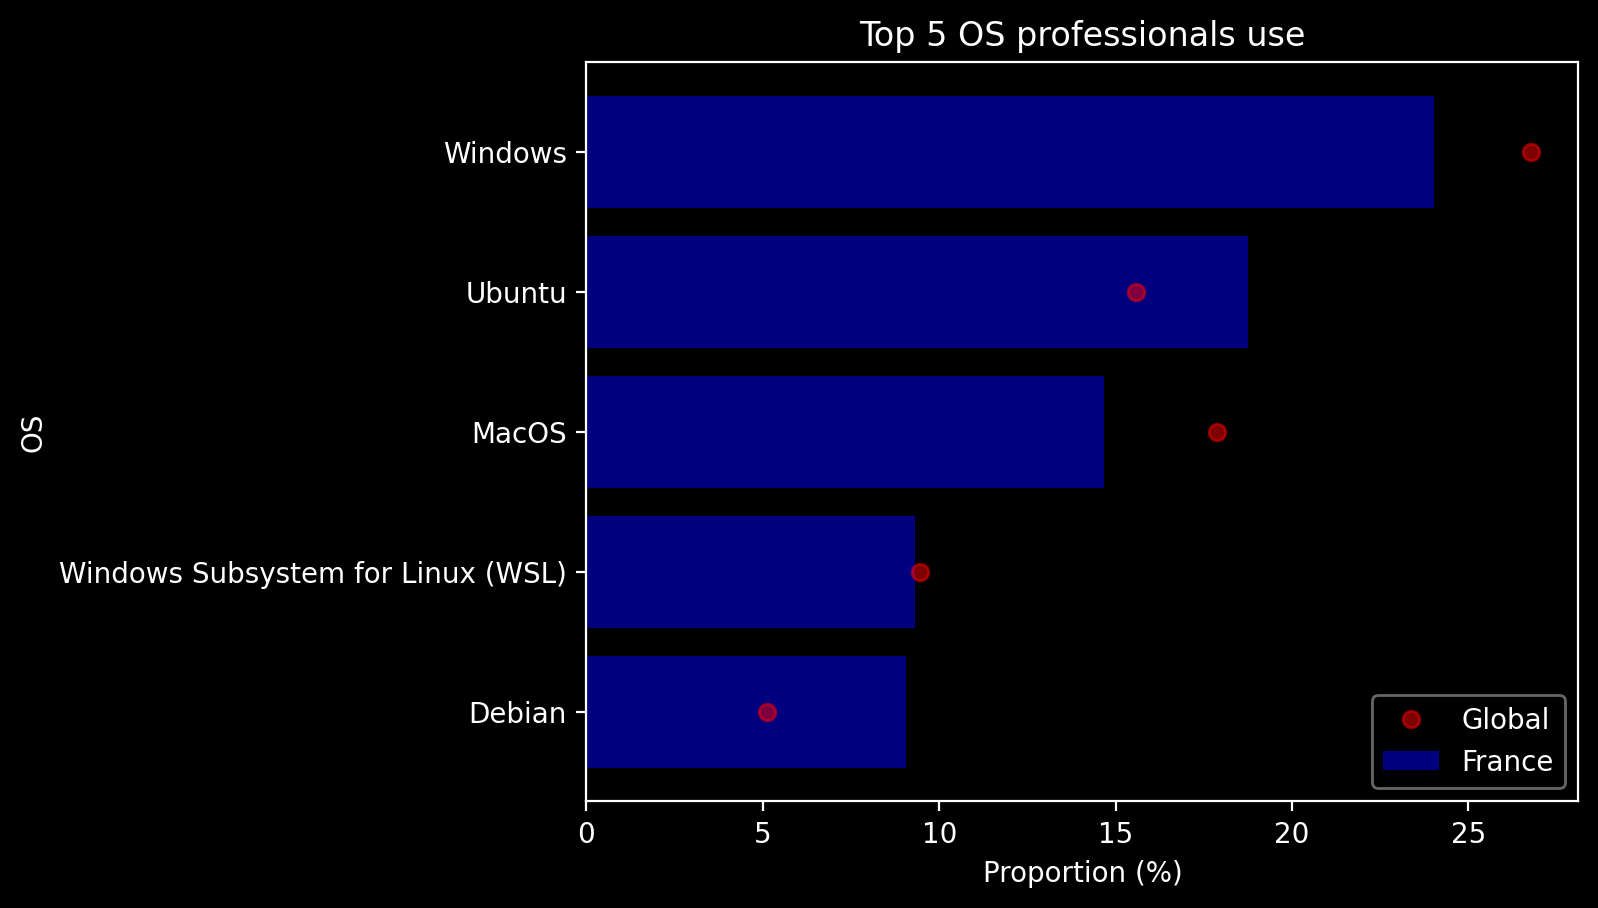

In [16]:
plot_value(
  column="OpSysProfessional use",
  label="OS",
  title="Top 5 OS professionals use",
)

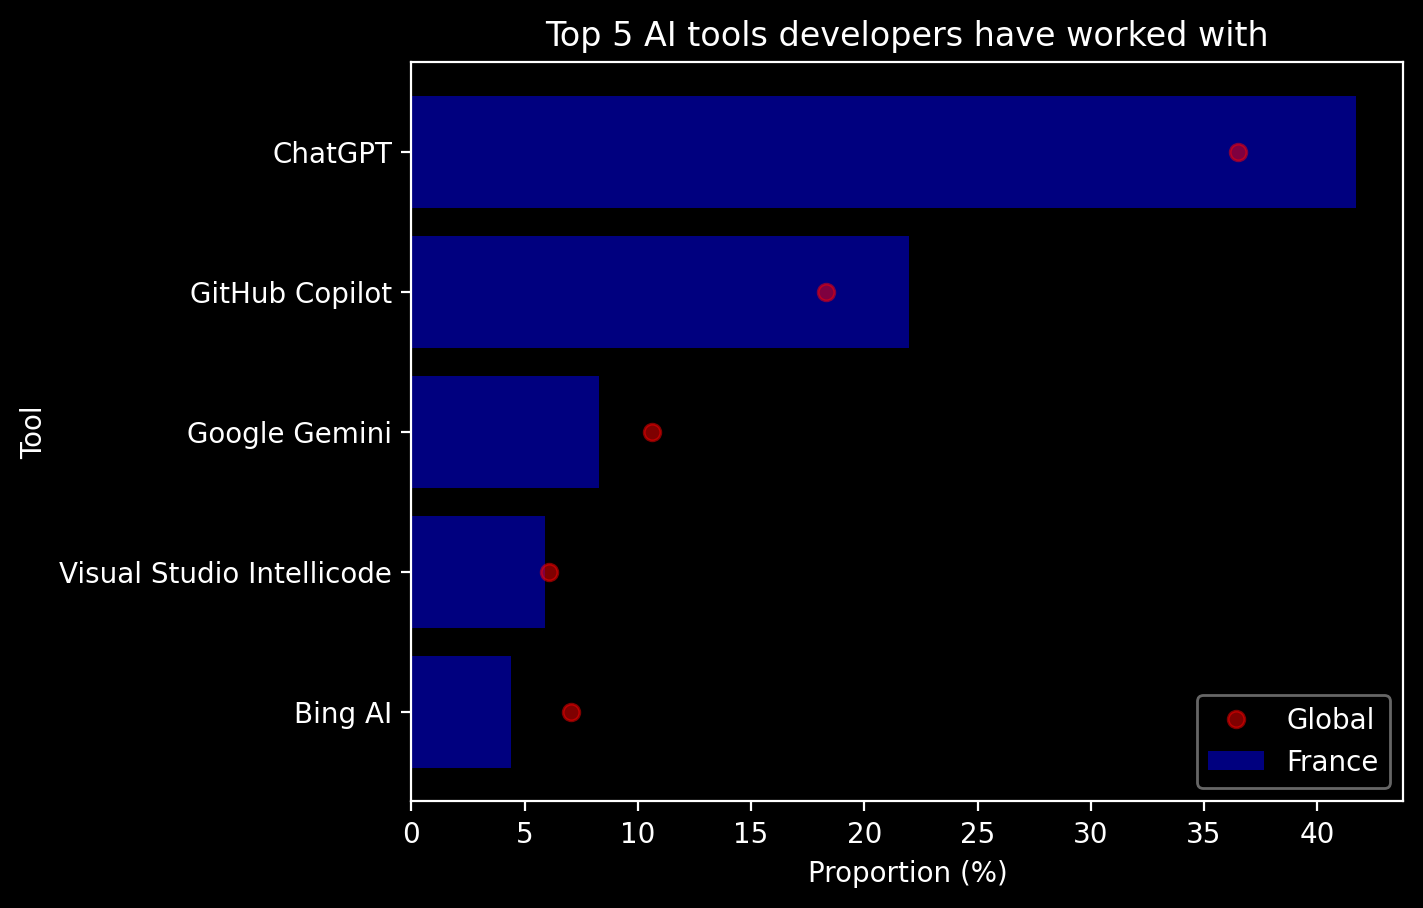

In [17]:
plot_value(
  column="AISearchDevHaveWorkedWith",
  label="Tool",
  title="Top 5 AI tools developers have worked with",
)

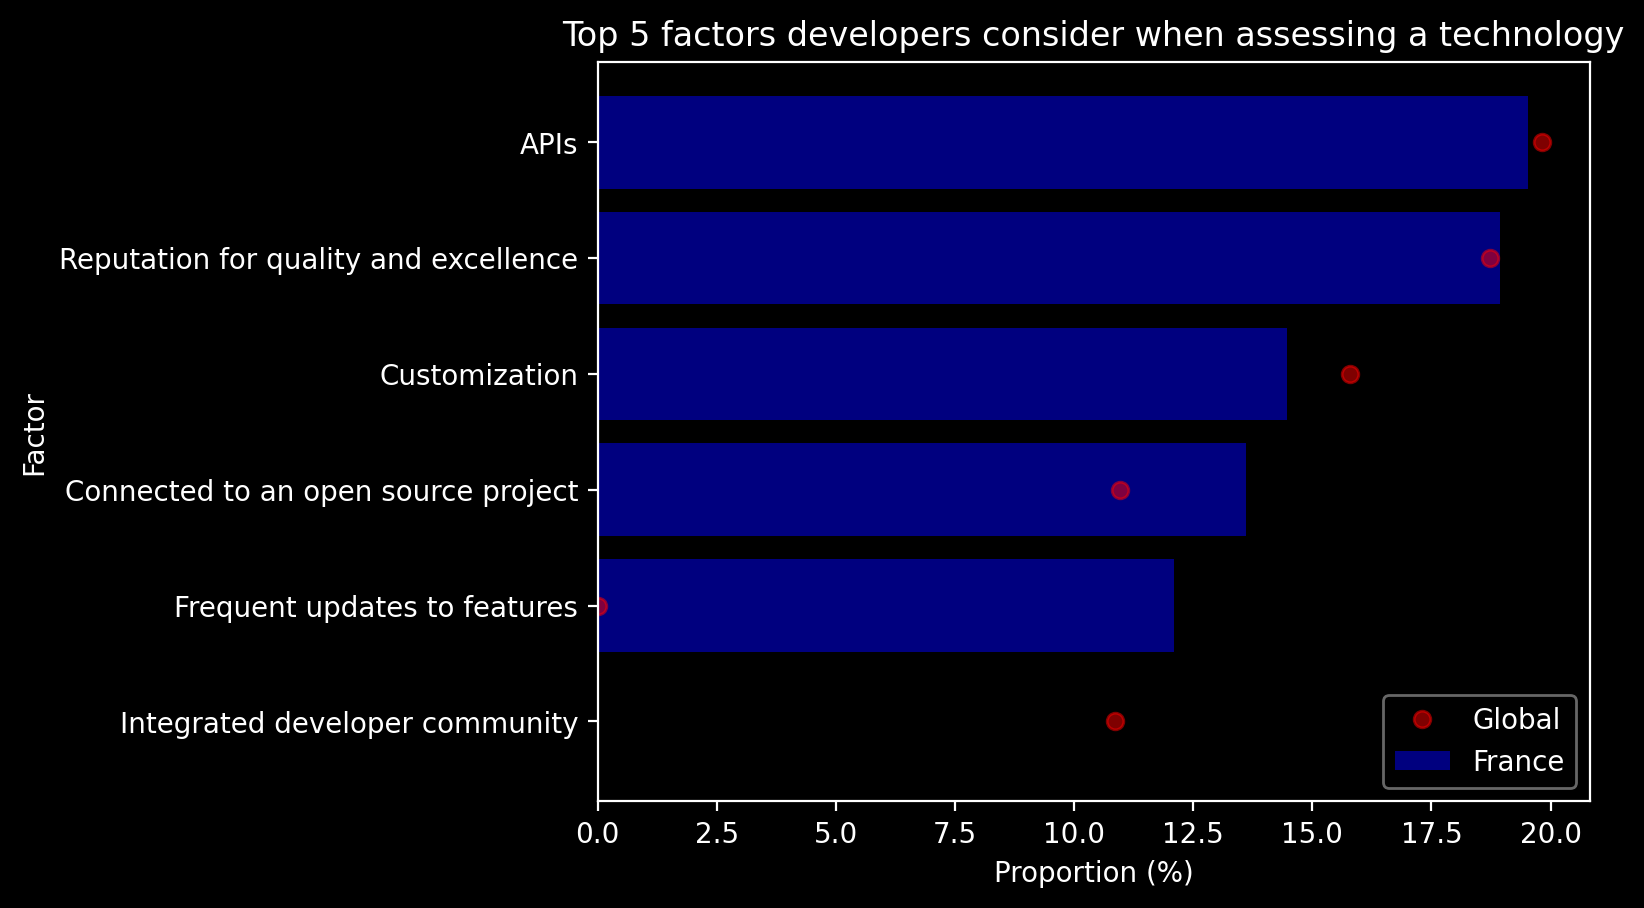

In [18]:
plot_value(
  column="TechEndorse",
  label="Factor",
  title="Top 5 factors developers consider when assessing a technology",
)

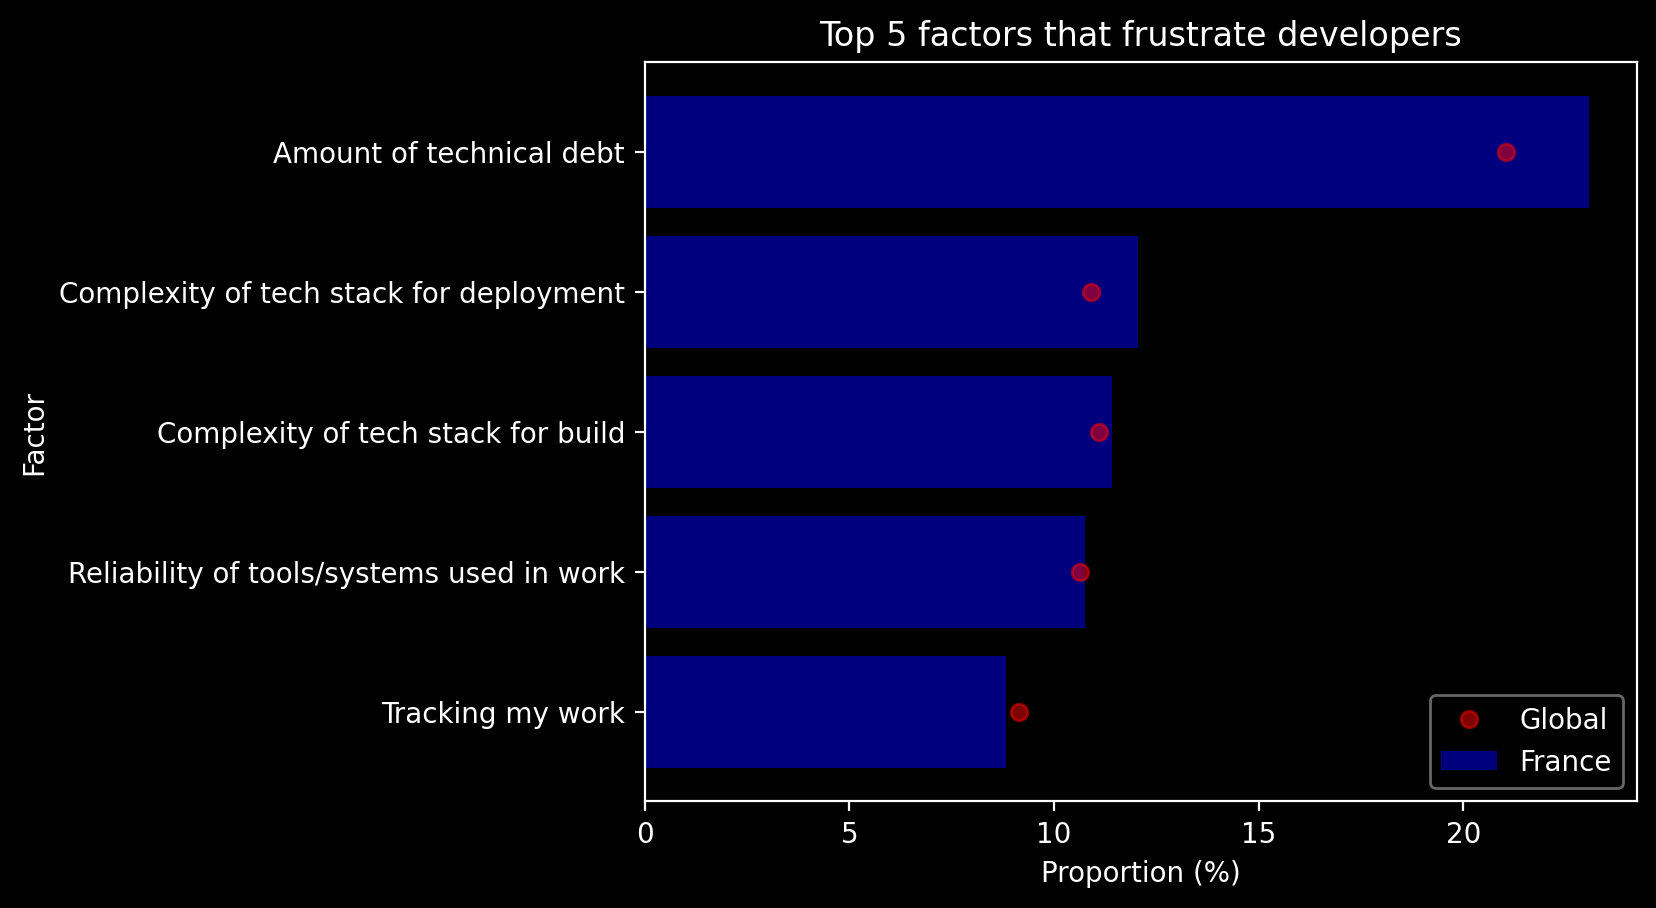

In [19]:
plot_value(
  column="Frustration",
  label="Factor",
  title="Top 5 factors that frustrate developers",
)

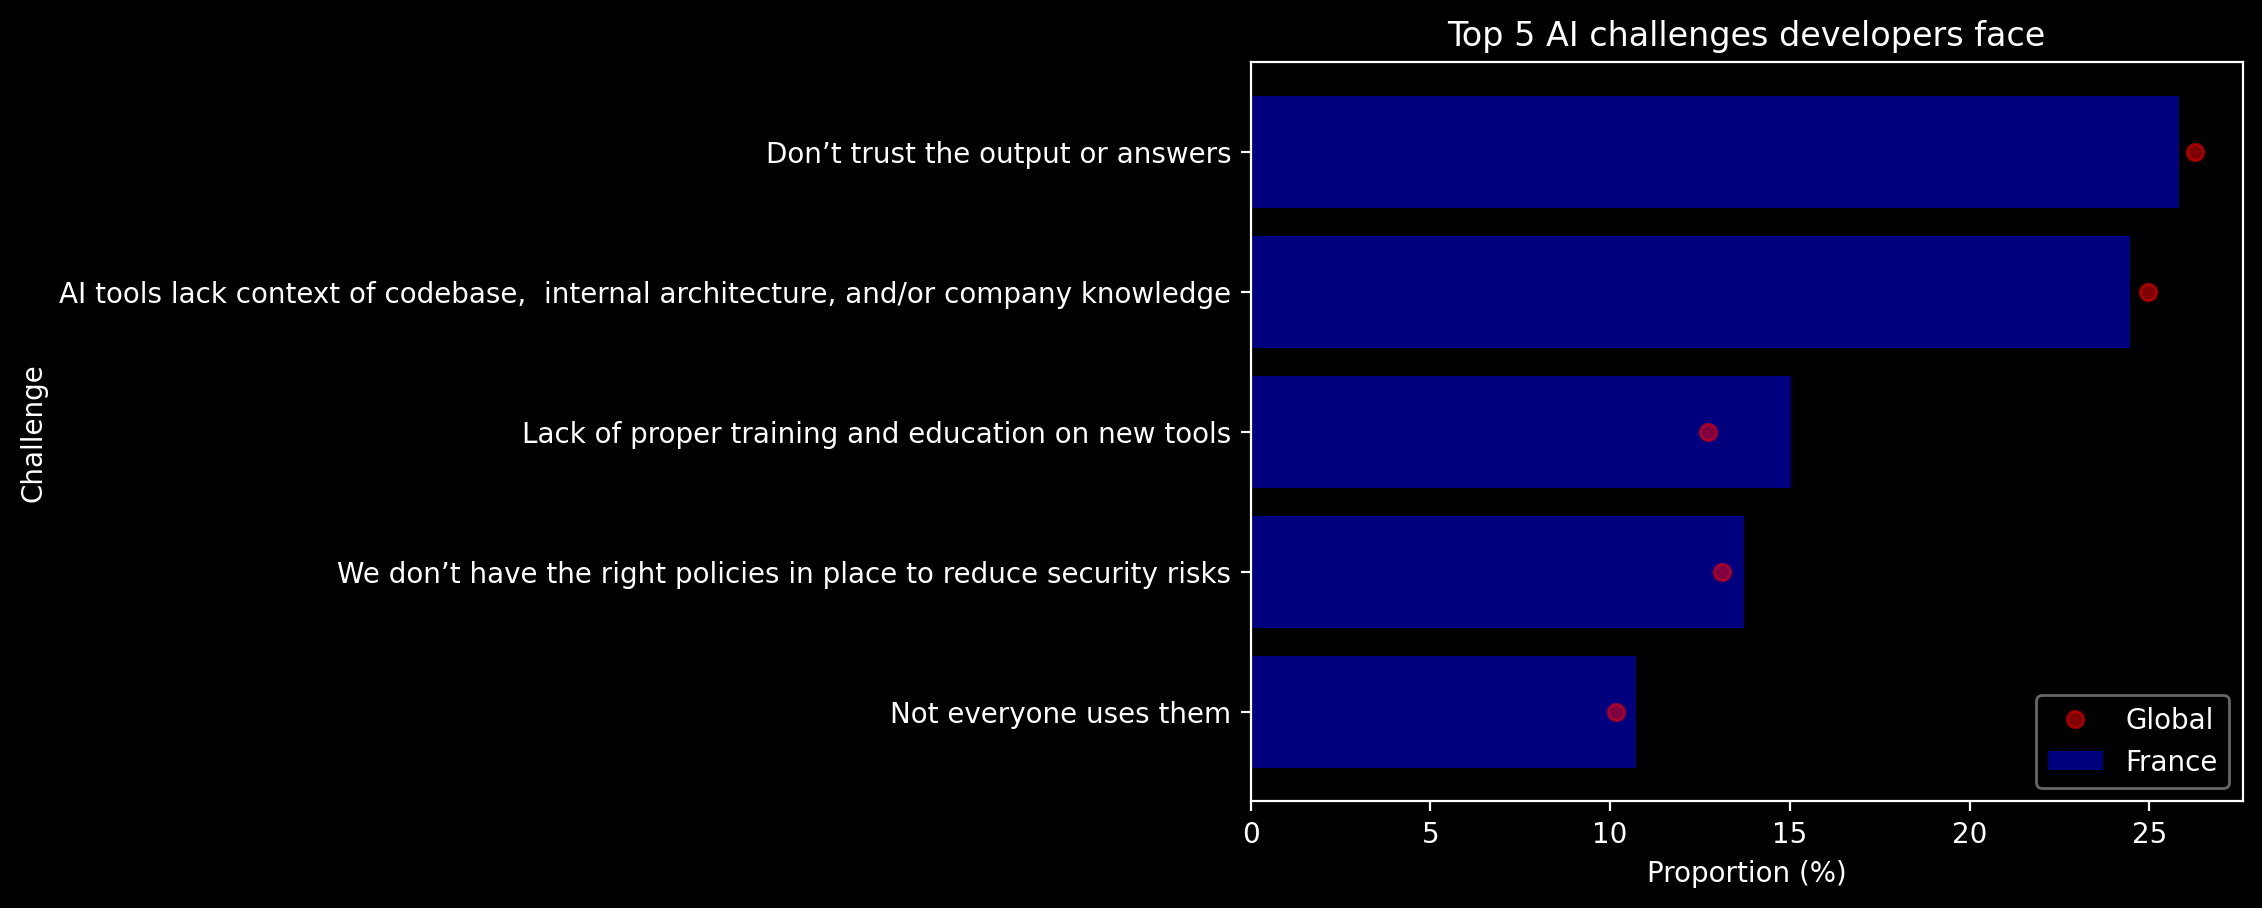

In [20]:
plot_value(
  column="AIChallenges",
  label="Challenge",
  title="Top 5 AI challenges developers face",
)